# Projections

This notebook illustrates how to project different images, shapes and texts onto the camera.

In [4]:
import numpy as np

from control import aod_h, aod_v
from matplotlib import pyplot as plt

We start off with a a function that reads us an image into a numpy array.

In [5]:
from PIL import Image

def read(filename):
    return np.array(Image.open(filename))[:, :, 0]

Next we write a function that takes an image as numpy array and returns the frequency sequence required to project the image through the laser on to the camera.

In [6]:
freq_center = 100e6
freq_scale = 20e6

def image_to_frequencies(image):
    i, j = np.argwhere(image == image.min()).transpose()

    i = i / image.shape[0]
    j = j / image.shape[1]
    
    x = -freq_scale * i[::1] + freq_center + freq_scale / 2
    y = freq_scale * j[::1] + freq_center - freq_scale / 2

    return x, y

First let us try to project *Cs* for *Caesium* onto the camera. We prepared an image file with the *Cs* using some online text to image service.

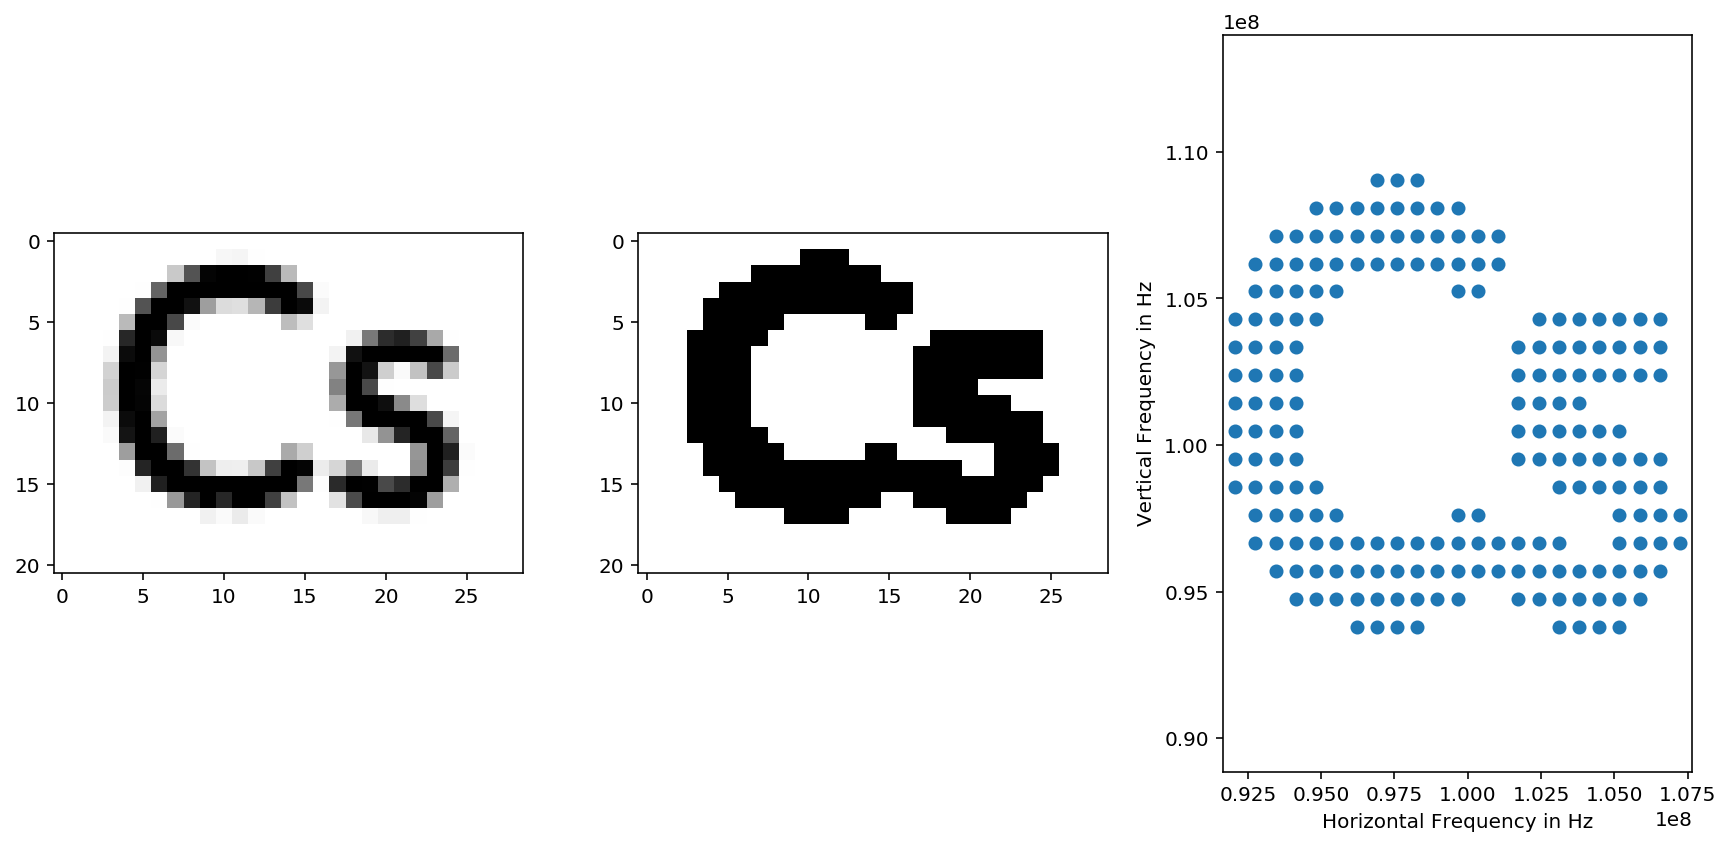

In [7]:
cs = read('../media/image/samples/cs.png')

plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(cs, cmap='gray')

plt.subplot(132)
plt.imshow(cs == cs.max(), cmap='gray')

freq_h, freq_v = image_to_frequencies(cs == cs.max())
#aod_v(frequency=freq_v)
#aod_h(frequency=freq_h)

plt.subplot(133)
plt.axis('equal')
plt.margins(0)
plt.xlabel('Horizontal Frequency in Hz')
plt.ylabel('Vertical Frequency in Hz')
plt.scatter(freq_v, freq_h)

plt.tight_layout()
plt.show()

Analogue we can also project a pi.

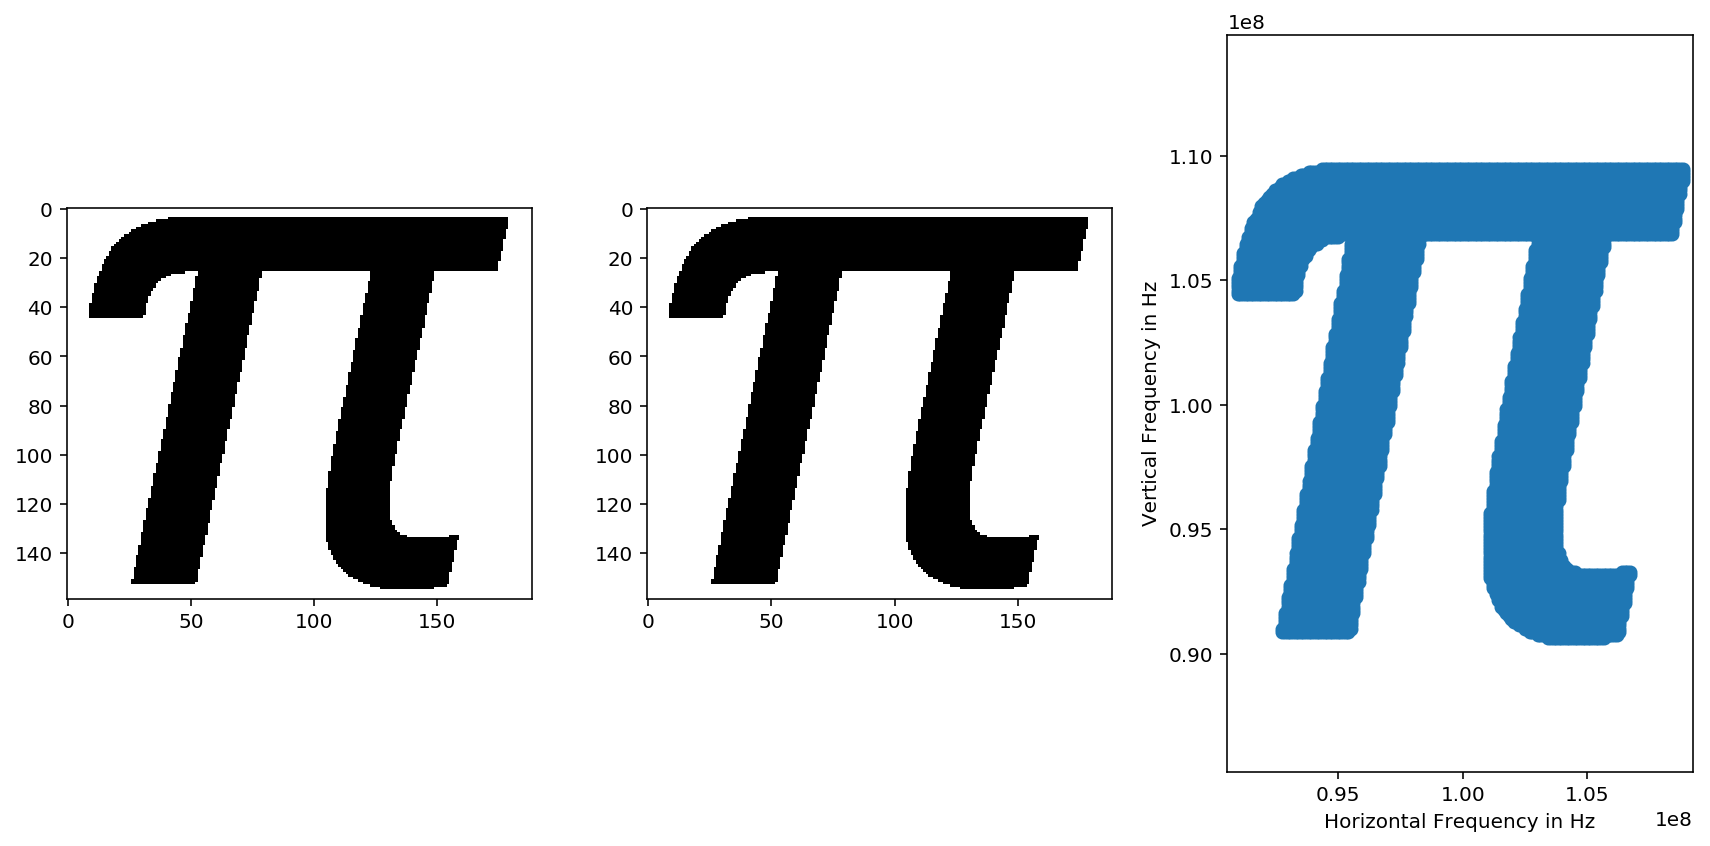

In [8]:
pi = read('../media/image/samples/pi.png')

plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(pi, cmap='gray')

plt.subplot(132)
plt.imshow(pi == pi.max(), cmap='gray')

freq_h, freq_v = image_to_frequencies(pi == pi.max())
#aod_v(frequency=freq_v)
#aod_h(frequency=freq_h)

plt.subplot(133)
plt.axis('equal')
plt.margins(0)
plt.xlabel('Horizontal Frequency in Hz')
plt.ylabel('Vertical Frequency in Hz')
plt.scatter(freq_v, freq_h)

plt.tight_layout()
plt.show()

Time for something more sophisticated. We will project single letters. In order to use the previously functions we write a function to convert a string to a numpy image.

In [10]:
from PIL import Image, ImageDraw, ImageFont

font = ImageFont.truetype(font='/Library/Fonts/Verdana.ttf', size=20)

def string_to_frequencies(string):
    image = Image.new('1', (100, 30), color=0)
    
    draw = ImageDraw.Draw(image)
    draw.text((0, 0), string, fill=1, font=font)

    return np.array(image.resize((400, 80), Image.ANTIALIAS))[:, :]

The resolution of the synthesizer is powerful enough to project short names.

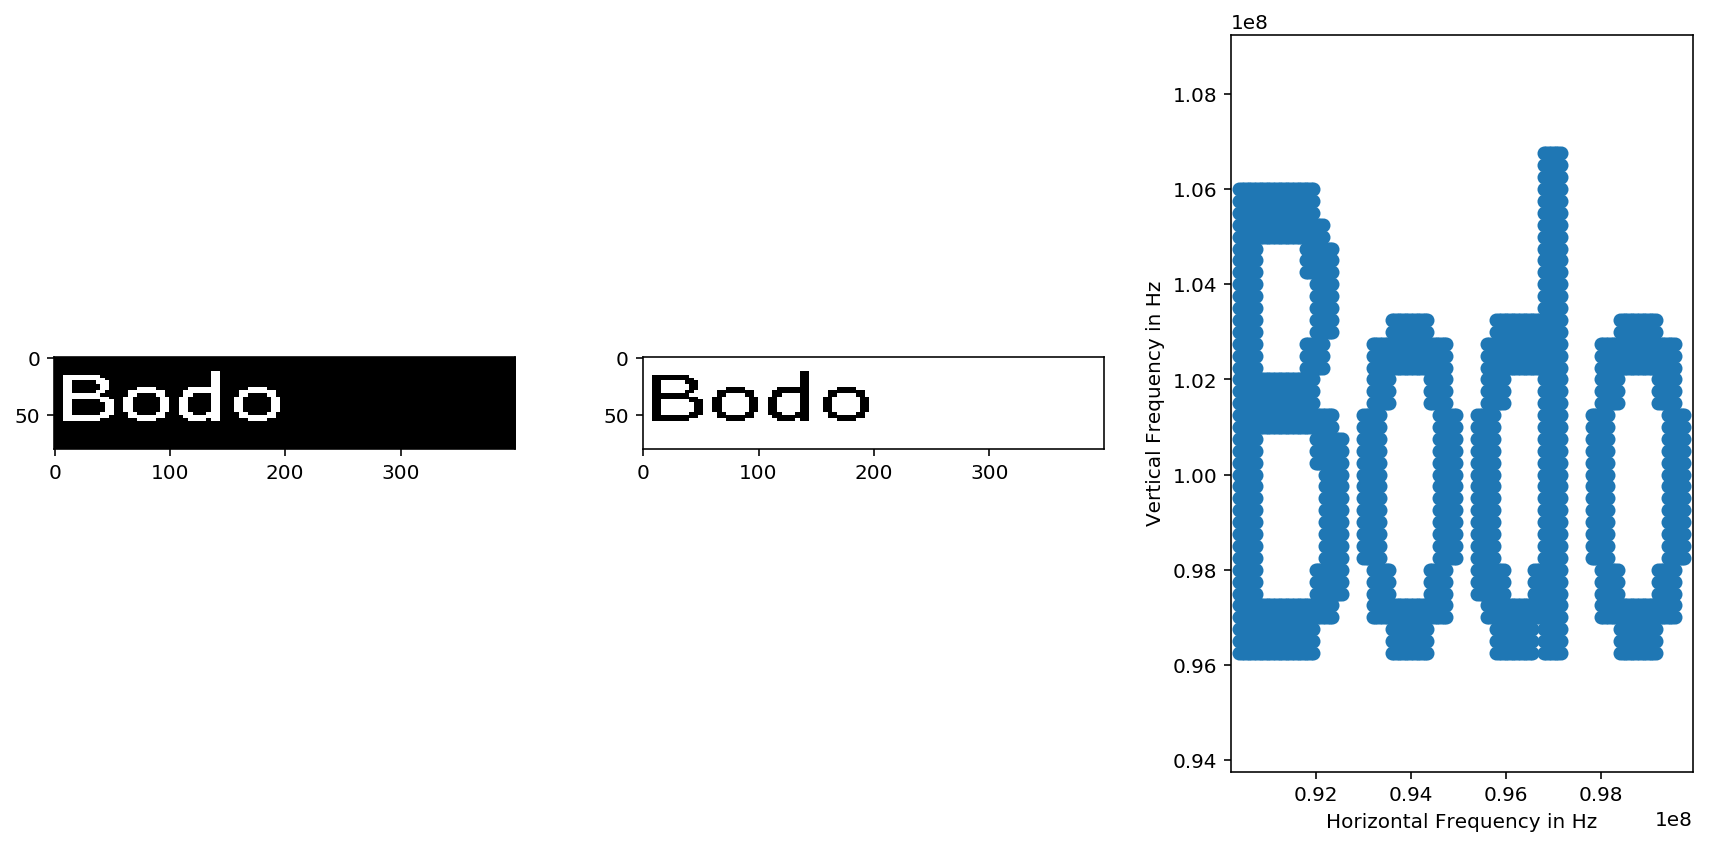

In [11]:
bodo = string_to_frequencies('Bodo')

plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(bodo, cmap='gray')

plt.subplot(132)
plt.imshow(bodo == bodo.min(), cmap='gray')

freq_h, freq_v = image_to_frequencies(bodo == bodo.min())
#aod_v(frequency=freq_v)
#aod_h(frequency=freq_h)

plt.subplot(133)
plt.axis('equal')
plt.margins(0)
plt.xlabel('Horizontal Frequency in Hz')
plt.ylabel('Vertical Frequency in Hz')
plt.scatter(freq_v, freq_h)

plt.tight_layout()
plt.show()

Finally we want to project a square shape.

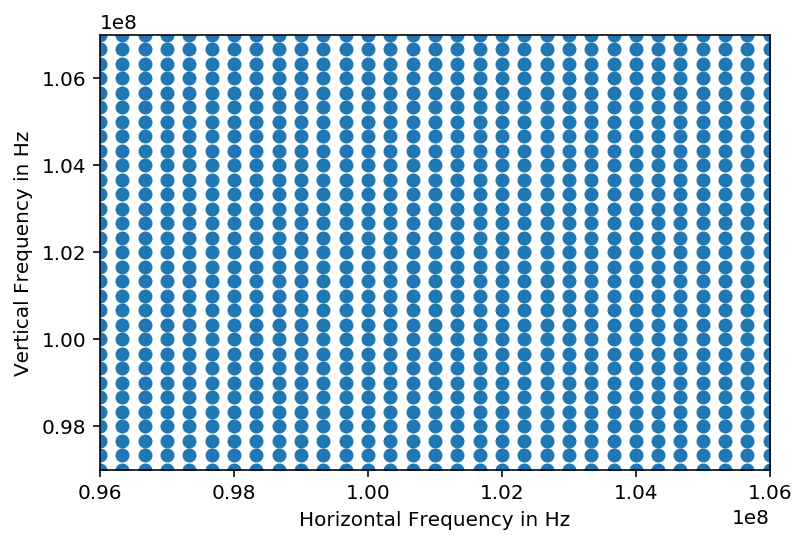

In [12]:
t = np.linspace(0, 1, 31)
i, j = np.meshgrid(t, t)

i = i.reshape(-1)
j = j.reshape(-1)

x = 10e6*i+97e6
y = 10e6*j+96e6

#aod_v(frequency=x)
#aod_h(frequency=y)

plt.margins(0)
plt.xlabel('Horizontal Frequency in Hz')
plt.ylabel('Vertical Frequency in Hz')
plt.scatter(y, x)
plt.show()